# Cereal Visualizations 

## Context
Using the kaggle 80 Cereals data set and python, I explored nutritional and manufacturer information visually for a Thinkful assignment. 

### Content
The format is as follows:
 - Content of dataset and acknowledgements
 - Data set exploration
 - 5 Visualisations
 

#### Fields in the dataset:

__Name: Name of cereal__

__mfr: Manufacturer of cereal__<br>
A = American Home Food Products <br>
G = General Mills <br>
K = Kelloggs <br>
N = Nabisco <br>
P = Post <br>
Q = Quaker Oats <br>
R = Ralston Purina <br>

__type: cold/hot <br>
calories: calories per serving<br>
protein: grams of protein<br>
fat: grams of fat<br>
sodium: milligrams of sodium<br>
fiber: grams of dietary fiber<br>
carbo: grams of complex carbohydrates<br>
sugars: grams of sugars<br>
potass: milligrams of potassium<br>
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended<br>
shelf: display shelf (1, 2, or 3, counting from the floor)<br>
weight: weight in ounces of one serving<br>
cups: number of cups in one serving<br>
rating: a rating of the cereals (Possibly from Consumer Reports?)<br>__

Acknowledgements:<br>
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found here
https://www.kaggle.com/crawford/80-cereals


In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('cereal.csv')

# dataset exploration--getting a feel for the data set.
print(df.head())
print(df.dtypes)
print(np.shape(df))
print(df.type.value_counts())
print (df.mfr.value_counts())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
name         object
mfr          object
type         object
calories      int64
protein       int64
fat  

### General Nutritional Subplots
The four plots below were used to explore and compare possible correlations based on calories. I was expecting a more evident relationship between sugar/calories.  As servings sizes can differ, a better comparison may be if the servings were uniform. In comparing them it seems there is a "clustering" around 100-120 Calories per serving.  This may be an informal industry standard.  

There are some outliers--not sure I would want to eat that cereal with the high fiber content and low caloric density (14 grams of fiber!). I am curious about the very low carb cereal in plot 2 and the very high fat cereal in plot 3.  

Text(0.5,1,'Cereals: Fiber & Nutrition Content')

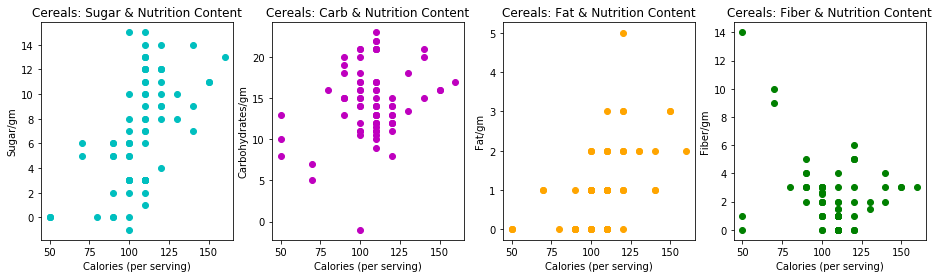

In [414]:
plt.figure(figsize=(20, 4))

#Sugar info
plt.subplot(1, 5, 1)
plt.scatter(df["calories"],df["sugars"], color="c")
plt.xlabel("Calories (per serving)")
plt.ylabel('Sugar/gm')
plt.title('Cereals: Sugar & Nutrition Content')

#Carb info
plt.subplot(1, 5, 2)
plt.scatter(df["calories"],df["carbo"], color="m")
plt.xlabel("Calories (per serving)")
plt.ylabel('Carbohydrates/gm')
plt.title('Cereals: Carb & Nutrition Content')

#Fat info
plt.subplot(1, 5, 3)
plt.scatter(df["calories"],df["fat"], color="orange")
plt.xlabel("Calories (per serving)")
plt.ylabel('Fat/gm')
plt.title('Cereals: Fat & Nutrition Content')

#Fiber info
plt.subplot(1, 5, 4)
plt.scatter(df["calories"],df["fiber"], color="g")
plt.xlabel("Calories (per serving)")
plt.ylabel('Fiber/gm')
plt.title('Cereals: Fiber & Nutrition Content')


### Distribution of Macro Nutrition
The histogram below explores the macro nutritional info of the cereals.  Fat and fiber skew negatively and carbs skew less dramatically positively.  So, overall, cereal is a low-protein and low-fiber food, but is consistently higher in carbs.  If you chose a random box, you most likely would be eating a serving of cereal with around 15 grams of carbs, 1 gram of fat, and 3 grams of protein.

The "normed" kwarg has been deprecated, so "density" was used to allow a better comparison.

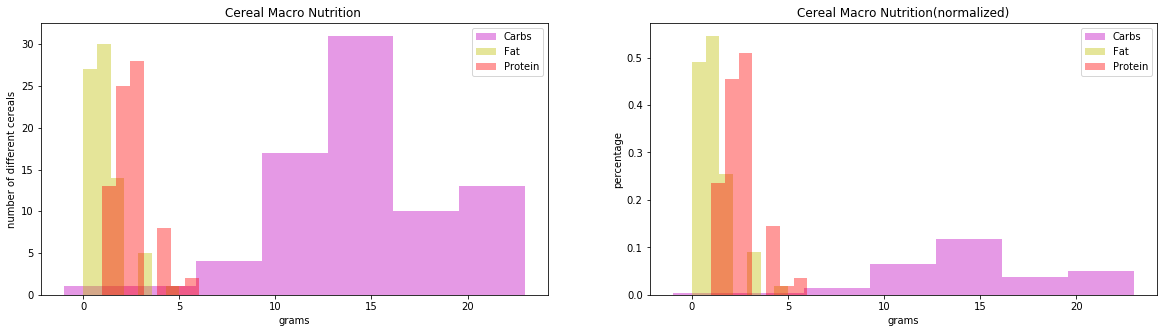

In [415]:
#plt.hist(df["fiber"], color='red', alpha = .4)
plt.figure(figsize = (20,5))


plt.subplot(1,2,1)
plt.hist(df["carbo"],bins = 7, color = "m",alpha=.4, label="Carbs")
plt.hist(df["fat"], bins = 7, color="y",alpha=.4, label="Fat")
plt.hist(df["protein"], bins = 7, color="r", alpha = .4, label="Protein")
plt.title("Cereal Macro Nutrition ")
plt.xlabel("grams")
plt.ylabel("number of different cereals")
plt.legend()

plt.subplot(1,2,2)
plt.hist(df["carbo"], density = True, bins = 7, color = "m",alpha=.4, label="Carbs")
plt.hist(df["fat"], density = True, bins = 7, color="y",alpha=.4, label="Fat")
plt.hist(df["protein"], density = True, bins = 7, color="r", alpha = .4, label="Protein")
plt.title("Cereal Macro Nutrition(normalized)")
plt.xlabel("grams")
plt.ylabel("percentage")
plt.legend()


#plt.hist(df["sugars"], density = True, bins = 5, color="b", alpha = .4)
#plt.hist(df["fiber"], density = True, bins = 5, color="g", alpha = .4)
plt.show()

### Speaking of Fiber--Boxplots

A little curious about the outliers in the Fiber content of cereals, I created a boxplot of the information.  There's three main outliers.  The median fiber content is 2 grams per serving.

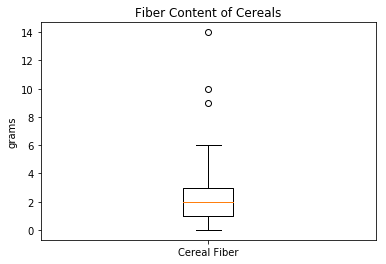

In [416]:
plt.boxplot(df["fiber"])
plt.title("Fiber Content of Cereals")
plt.ylabel("grams")
plt.xticks([1],["Cereal Fiber"])

plt.show()

### Scatter Plots and Shelf Placement

The shelf placement scatterplot shows the major food companies with a presence on all shelves.  Ralston Purina does not have a presence in the middle shelf area (possibly eye-level), andAmerican Home Foods Products, although having a small presence, has a prime retail location.  

I included the code used to change the yticks, so I can follow-up at a later date.  I thought showing only the location as a whole integer would be less distracting.  Also, changing the shape of the markers mimicked the appearance of cereal boxes on a shelf. 



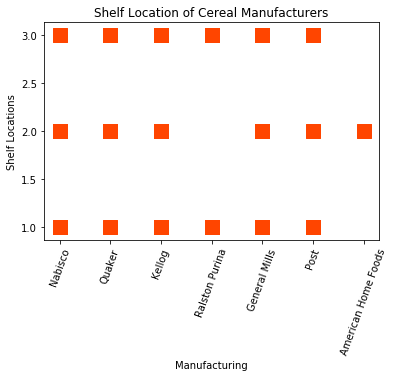

In [417]:
#mfr_colors = {'N':'y', 'Q':'blue', 'K':'maroon', 'R':'black', 'G':'cyan', 'P':'grey', 'A':'g'}

plt.scatter(df["mfr"],df["shelf"], marker="s", s=200, c="orangered")
plt.xlabel("Manufacturing")
plt.ylabel('Shelf Locations')
plt.xticks(['N','Q','K','R','G','P','A'], ['Nabisco','Quaker','Kellog','Ralston Purina','General Mills','Post','American Home Foods'], rotation = 70)
plt.title('Shelf Location of Cereal Manufacturers')


#The attempts below were used to change the yticks. First line is from matplotlib documentation, the second is from a Data Camp exercise.
#plt.yticks(arange(3), ('1', '2', '3')
#plt.ticks([1.00,2.00,3.00],[1,2,3])

plt.show()

### The Rabit Hole

After the previous scatter plot, I wanted to explore a bubble chart that would show the manufacturers shelf location and overall presence.  Beyond learning more, this was not successful.  It is not simple nor elegant, but I included it to revisit and discuss.

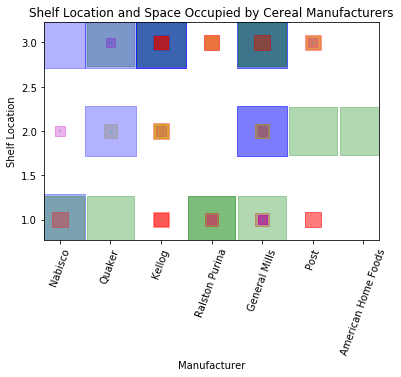

In [419]:
#prepping the data to use.  Counting the frequency of a manufacturer for each record of info.
mfr_counts = df['mfr'].value_counts()
#creating and array and increasing the size of the data so to better visualize
np_mfr_counts = (np.array(mfr_counts))**2.5

#shelf_counts = df["shelf"].value_counts()

#attempts to map a color onto the manufacturers for easier identification.
#Index = {A:"American Home Food Products", G:"General Mills", K:"Kelloggs", N:"Nabisco", P:"Post", Q:"Quaker Oats", R:"Ralston Purina"}
#Index = "American Home Food Products","General Mills","Kelloggs","Nabisco","Post","Quaker Oats","Ralston Purina"

#only success found to differientiate the placement by manufacturing--without a map, and it only confuses the image.
#I used 7 colors for the manufacturers, but it almost looks like the colors are applied randomly.
colors = "b", "g", "r", "y", "r", "m", "c"

plt.scatter(
    x=df["mfr"],
    y=df["shelf"],
    s=np_mfr_counts,
    marker = "s",
    alpha = .3,
    color = colors
)

plt.xlabel('Manufacturer')
plt.ylabel('Shelf Location')
plt.xticks(['N','Q','K','R','G','P','A'], ['Nabisco','Quaker','Kellog','Ralston Purina','General Mills','Post','American Home Foods'], rotation = 70)
plt.title('Shelf Location and Space Occupied by Cereal Manufacturers')



plt.show()